## Prepae a Forecasting model on coca cola prices

Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("D:/assingment/Forecasting/CocaCola_Sales_Rawdata.xlsx")

In [3]:
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [4]:
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [5]:
df.tail()

,Quarter,Sales
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


In [6]:
df.columns

Index(['Quarter', 'Sales'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [8]:
df.dtypes

Quarter     object
Sales      float64
dtype: object

In [9]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [10]:
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [11]:
df[df.duplicated()].shape

(0, 2)

In [12]:
df['Quarters'] = 0
df['Year'] = 0
for i in range(42):
    p = df["Quarter"][i]
    df['Quarters'][i]= p[0:2]
    df['Year'][i]= p[3:5]

In [13]:
df.head()

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [14]:
# Getting dummy variables for Quarters Q1, Q2, Q3, Q4 
Quarters_Dummies = pd.DataFrame(pd.get_dummies(df['Quarters']))
df = pd.concat([df,Quarters_Dummies],axis = 1)
df.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


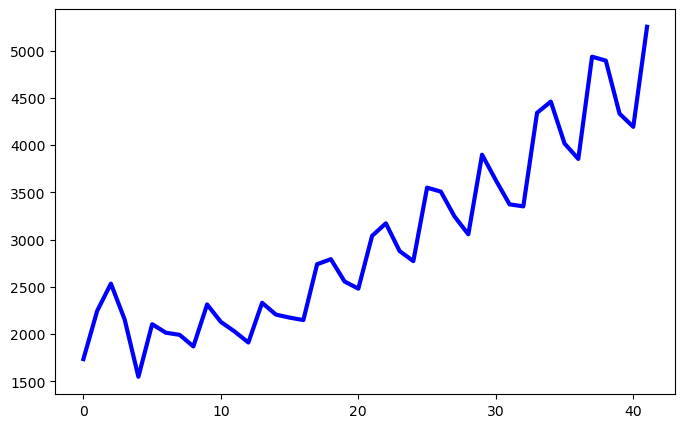

In [15]:
# Lineplot for Sales of CocaCola
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(df['Sales'], color = 'blue', linewidth=3)

<AxesSubplot:>

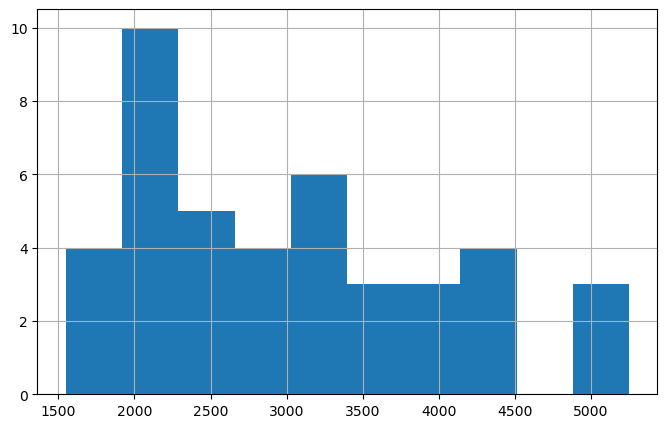

In [16]:
# Histogram
df['Sales'].hist(figsize=(8,5))

<AxesSubplot:ylabel='Density'>

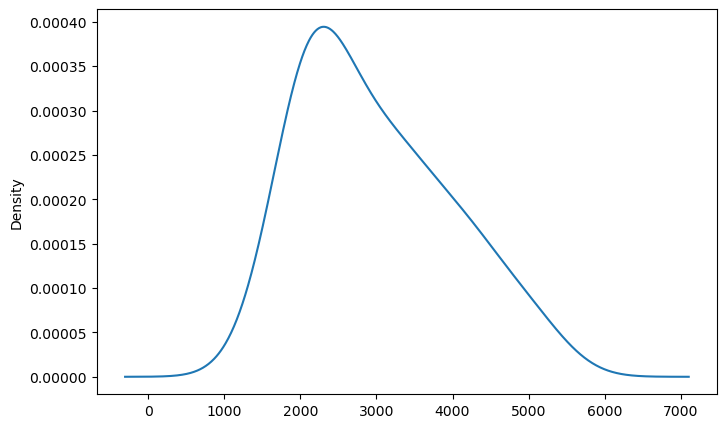

In [17]:
# Density Plot
df['Sales'].plot(kind = 'kde', figsize=(8,5))

<AxesSubplot:xlabel='Quarters', ylabel='Sales'>

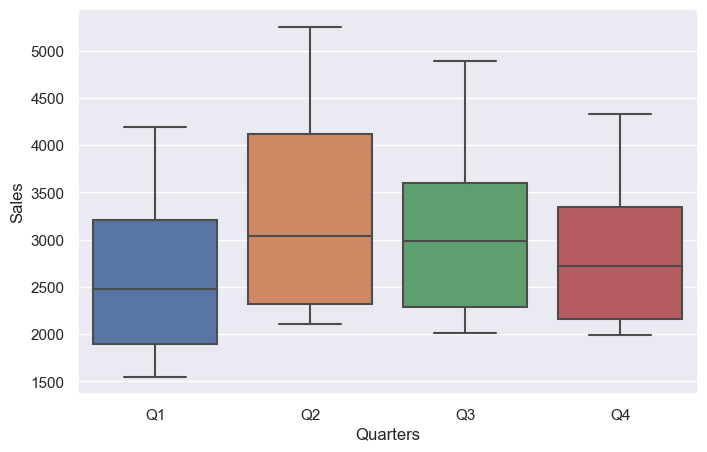

In [18]:
#boxplot of Quarters Vs. Sales
import seaborn as sns
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x="Quarters",y="Sales",data=df)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

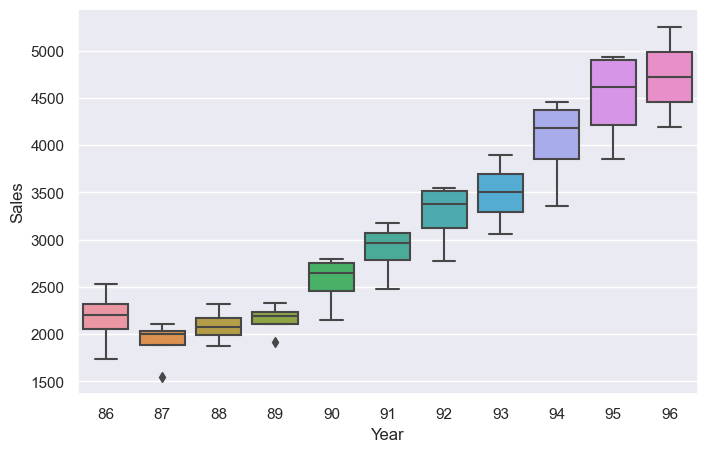

In [19]:
# boxplot of Years Vs. Sales
sns.boxplot(x="Year",y="Sales",data=df)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


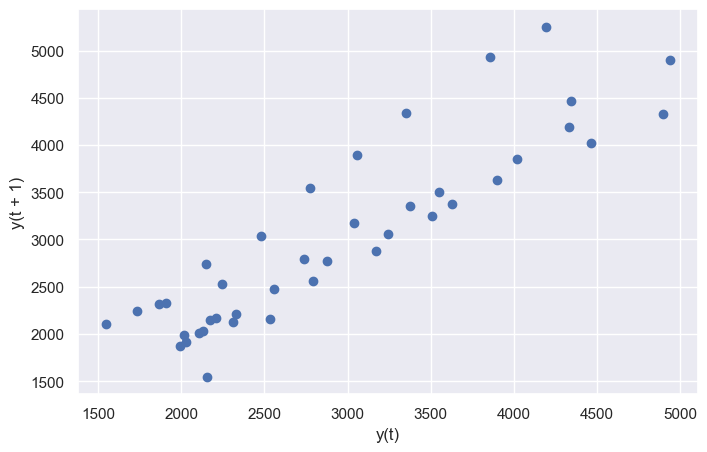

In [20]:
from pandas.plotting import lag_plot
lag_plot(df['Sales'])
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Sales'>

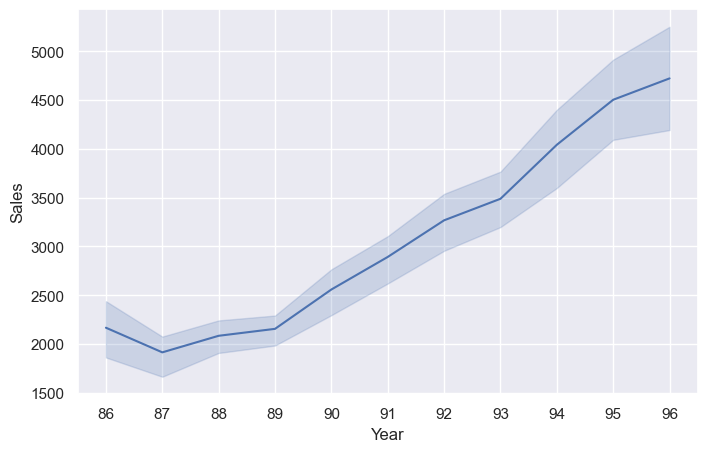

In [21]:
plt.figure(figsize=(8,5))
sns.lineplot(x="Year",y="Sales",data=df)

<AxesSubplot:xlabel='Quarters', ylabel='Year'>

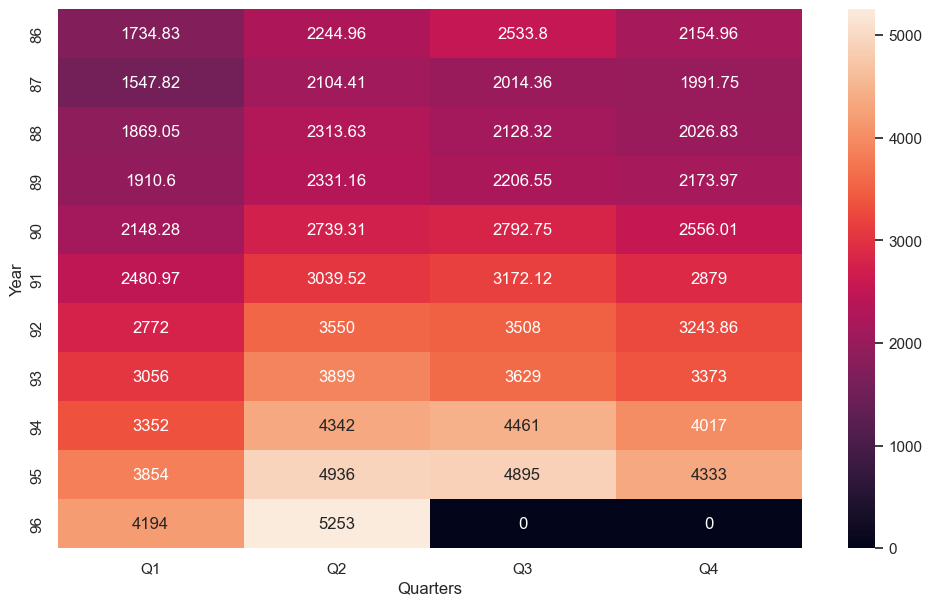

In [22]:
plt.figure(figsize=(12, 7))
heatmap_y_month = pd.pivot_table(data=df,values="Sales",index="Year",columns="Quarters",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

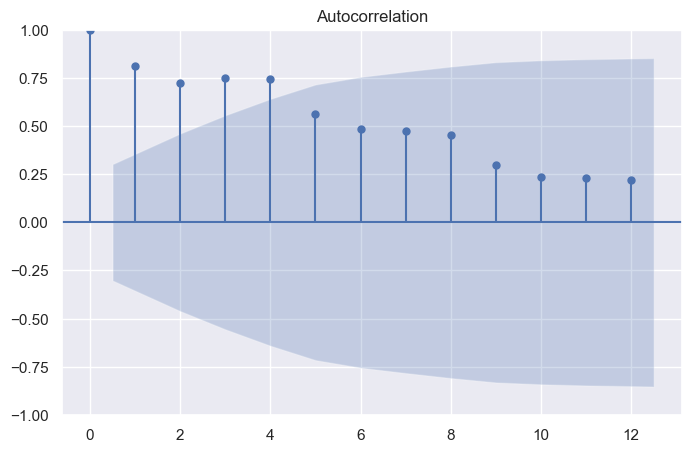

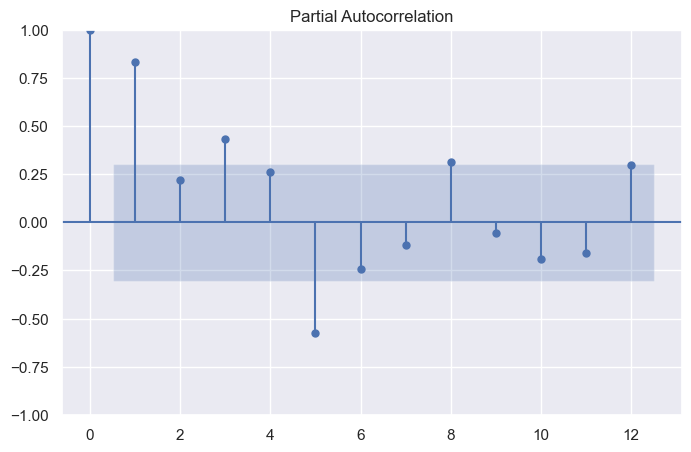

In [23]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Sales,lags=12)
tsa_plots.plot_pacf(df.Sales,lags=12)
plt.show()

In [24]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [25]:
# Splitting data into Train and Test (77/33)
Train = df.head(32)
Test = df.tail(10)

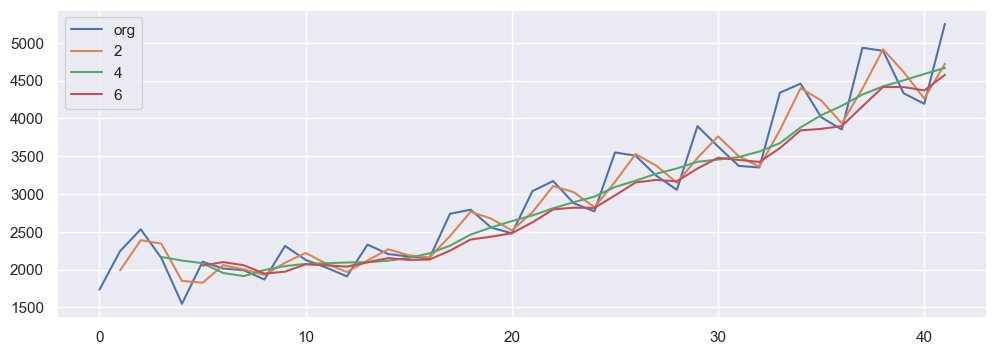

In [26]:
plt.figure(figsize=(12,4))
df.Sales.plot(label="org")
for i in range(2,8,2):
    df["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

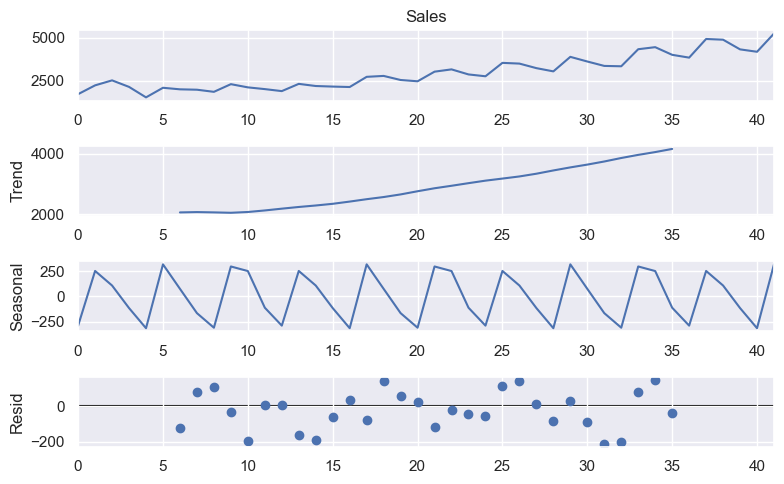

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(df.Sales,period=12)
decompose_ts_add.plot()
plt.show()

In [28]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [29]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses_model = RMSE(Test.Sales, pred_ses)
rmse_ses_model

1034.9359056453961

In [30]:
# Holt method
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw_model = RMSE(Test.Sales, pred_hw)
rmse_hw_model

941.6367810616845

# Holts winter exponential smoothing with additive seasonality and additive trend

In [31]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_add_model = RMSE(Test.Sales, pred_hwe_add_add)
rmse_hwe_add_add_model

633.4394050169811

## Holts winter exponential smoothing with multiplicative seasonality and additive trend


In [32]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_model_mul_add_model = RMSE(Test.Sales, pred_hwe_mul_add)
rmse_hwe_model_mul_add_model

568.1679856842486

## Model based Forecasting Methods

In [33]:
# Data preprocessing for models
df["t"] = np.arange(1,43)
df["t_squared"] = df["t"]*df["t"]

df["log_sales"] = np.log(df["Sales"])

df.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


# Splitting data


In [34]:
# Splitting data into Train and Test (77/33)
Train = df.head(32)
Test = df.tail(10)

In [35]:
Train.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


## Linear Model

In [36]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear_model = RMSE(Test['Sales'], pred_linear)
rmse_linear_model

752.9233932767132

## Exponential Model

In [37]:
Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp_model = RMSE(Test['Sales'], np.exp(pred_Exp))
rmse_Exp_model

590.3316432076668

## Quadratic Model

In [38]:
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad_model = RMSE(Test['Sales'], pred_Quad)
rmse_Quad_model

457.7357355407399

## Additive Seasonality model

In [39]:
add_sea = smf.ols('Sales~Q1+Q2+Q3',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1', 'Q2', 'Q3']]))
rmse_add_sea = RMSE(Test['Sales'], pred_add_sea)
rmse_add_sea

1850.466546185836

## Additive Seasonality Quadratic model

In [40]:
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','t','t_squared']]))
rmse_add_sea_Quad_model = RMSE(Test['Sales'], pred_add_sea_quad)
rmse_add_sea_Quad_model

277.351077112882

## Multiplicative Seasonality model

In [41]:
Mul_sea = smf.ols('log_sales~Q1+Q2+Q3',data=Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mul_sea = RMSE(Test['Sales'], np.exp(pred_Mult_sea))
rmse_Mul_sea

1908.2503948361164

## Multiplicative Additive Seasonality model

In [42]:
Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mul_Add_sea = RMSE(Test['Sales'], np.exp(pred_Mult_add_sea))
rmse_Mul_Add_sea

448.86781826917996

In [43]:
list = [['Simple Exponential Method',rmse_ses_model], ['Holt method',rmse_hw_model],
          ['HW exp smoothing add',rmse_hwe_add_add_model],['HW exp smoothing mult',rmse_hwe_model_mul_add_model],
          ['Linear Mode',rmse_linear_model],['Exp model',rmse_Exp_model],['Quad model',rmse_Quad_model],
          ['add seasonality',rmse_add_sea],['Quad add seasonality',rmse_add_sea_Quad_model],
          ['Mult Seasonality',rmse_Mul_sea],['Mult add seasonality',rmse_Mul_Add_sea]]

In [44]:
df1 = pd.DataFrame(list, columns =['Model', 'RMSE_Value']) 
df1

,Model,RMSE_Value
0,Simple Exponential Method,1034.935906
1,Holt method,941.636781
2,HW exp smoothing add,633.439405
3,HW exp smoothing mult,568.167986
4,Linear Mode,752.923393
5,Exp model,590.331643
6,Quad model,457.735736
7,add seasonality,1850.466546
8,Quad add seasonality,277.351077
9,Mult Seasonality,1908.250395


In [45]:
df.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


## Building final model with least RMSE value

In [46]:
final_model = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=df).fit()
pred_final = pd.Series(final_model.predict(df[['Q1','Q2','Q3','t','t_squared']]))
rmse_final_model = RMSE(df['Sales'], pred_final)
rmse_final_model

159.05522576522475

In [48]:
pred_df = pd.DataFrame({'Actual' : df.Sales, 'Predicted' : pred_final})
pred_df

,Actual,Predicted
0,1734.827000,1626.592727
1,2244.960999,2268.402339
2,2533.804993,2189.685821
3,2154.962997,1867.242917
4,1547.818996,1658.311143
5,2104.411995,2314.185178
6,2014.362999,2249.533083
7,1991.746998,1941.154603
8,1869.049999,1746.287252
9,2313.631996,2416.225709


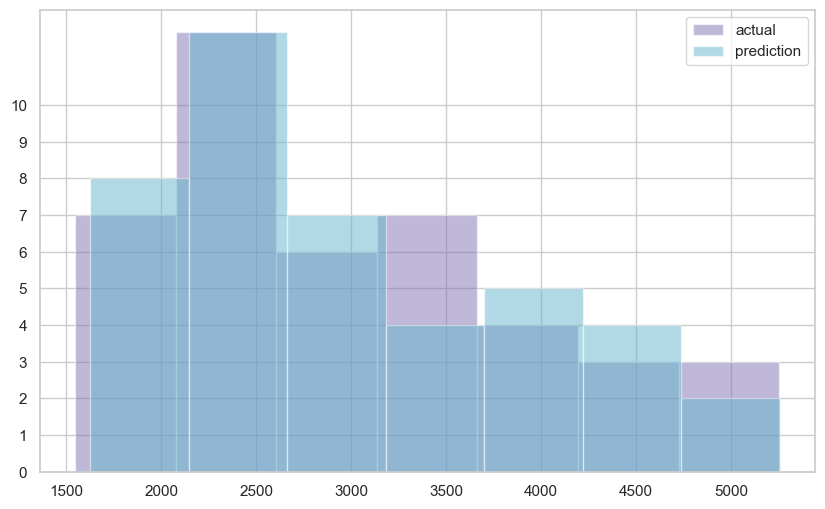

In [49]:
# Actual Vs Predicted graph

sns.set_style('whitegrid')

plt.rcParams['figure.figsize'] = (10, 6) 
_, ax = plt.subplots()
ax.hist(df.Sales, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(pred_final, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')
plt.show()


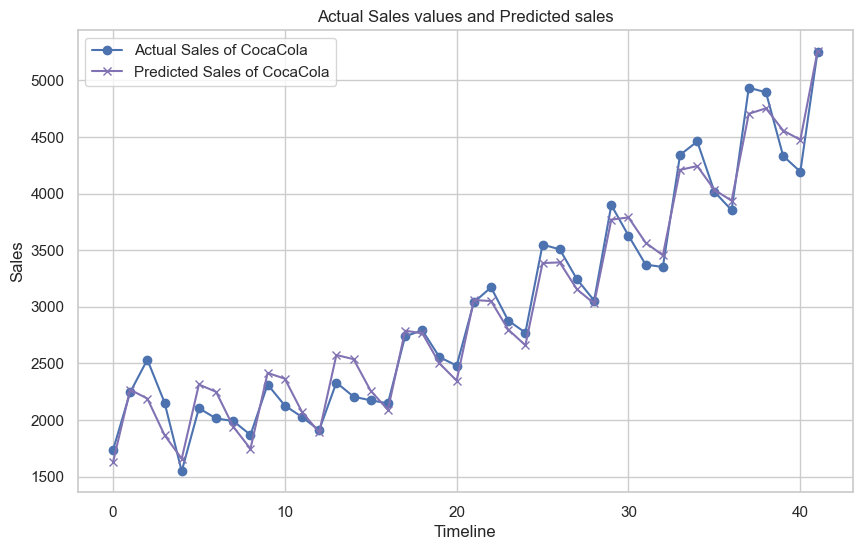

In [50]:
# Plot of Actual Sales values and Predicted sales values
plt.plot(df.Sales, color='b',marker='o', label='Actual Sales of CocaCola')
plt.plot(pred_final, color='m',marker='x', label='Predicted Sales of CocaCola')

# Added titles and adjust dimensions
plt.title('Actual Sales values and Predicted sales')
plt.xlabel("Timeline")
plt.ylabel("Sales")
plt.legend()
plt.rcParams['figure.figsize'] = (10,8) 

plt.show()